## Plots of NFL Fantasy Data

In [64]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [109]:
#read in excel file of historical NFL fantasy data
fantasy_df = pd.read_excel("Historical_Fantasy_Data_v2.xlsx", sheet = "Summary" )
fantasy_df.head()

,Unnamed: 0,Player,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,NaN,Russell Wilson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.9,20.9,20.9,21.5,17.5,22.4
1,NaN,Todd Gurley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.2,11.0,23.4
2,NaN,Cam Newton,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.2,21.0,18.6,18.6,24.9,17.9,19.7
3,NaN,Tom Brady,8.9,14.2,14.9,16.5,14.5,24.9,0.0,18.9,18.9,23.6,21.8,17.9,17.9,22.0,21.7,19.0
4,NaN,Alex Smith,0.0,0.0,0.0,0.0,11.3,5.6,0.0,13.2,13.2,13.4,8.0,15.1,15.1,17.4,15.5,20.0


In [111]:
#removed extra columns found in first look
fantasy_df.drop("Unnamed: 0", axis = 1, inplace = True)
fantasy_df.head()

,Player,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Russell Wilson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.9,20.9,20.9,21.5,17.5,22.4
1,Todd Gurley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.2,11.0,23.4
2,Cam Newton,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.2,21.0,18.6,18.6,24.9,17.9,19.7
3,Tom Brady,8.9,14.2,14.9,16.5,14.5,24.9,0.0,18.9,18.9,23.6,21.8,17.9,17.9,22.0,21.7,19.0
4,Alex Smith,0.0,0.0,0.0,0.0,11.3,5.6,0.0,13.2,13.2,13.4,8.0,15.1,15.1,17.4,15.5,20.0


In [112]:
#dataframe of only players with NFL fantasy data and criminal record
applicable_players = fantasy_df.loc[(fantasy_df["Player"] == "Kenny Britt") | 
                                    (fantasy_df["Player"] == "Fred Davis") |
                                    (fantasy_df["Player"] == "Jerome Simpson") |
                                    (fantasy_df["Player"] == "Matt Jones") |
                                    (fantasy_df["Player"] == "Cedric Benson") |
                                    (fantasy_df["Player"] == "Marshawn Lynch") |
                                    (fantasy_df["Player"] == "Mikel Leshoure") |
                                    (fantasy_df["Player"] == "Tre Mason") |
                                    (fantasy_df["Player"] == "Larry Johnson") |
                                    (fantasy_df["Player"] == "Justin Blackmon") |
                                    (fantasy_df["Player"] == "Joseph Randle") |
                                    (fantasy_df["Player"] == "Brandon Marshall") |
                                    (fantasy_df["Player"] ==  "Adrian Peterson") |
                                    (fantasy_df["Player"] == "Vincent Jackson"),
                                    :]

applicable_players

,Player,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
78,Marshawn Lynch,0.0,0.0,0.0,0.0,0.0,14.2,13.9,8.0,8.0,15.3,16.1,17.7,17.7,10.9,0.0,10.3
216,Adrian Peterson,0.3,0.0,0.0,3.7,0.0,17.3,15.7,17.2,17.2,16.5,20.5,0.0,0.0,15.4,0.0,7.3
280,Kenny Britt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.7,12.7,17.8,7.5,7.4,7.4,6.5,10.8,4.0
320,Brandon Marshall,0.0,0.0,0.0,0.0,3.6,14.3,13.9,11.5,11.5,12.4,17.2,11.4,11.4,17.8,8.4,0.0
353,Matt Jones,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.1,10.2,0.0
411,Vincent Jackson,0.0,0.0,0.0,0.0,6.2,6.3,11.6,10.2,10.2,12.5,14.0,9.1,9.1,9.1,0.0,0.0
426,Joseph Randle,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.3,3.3,11.5,0.0,0.0
456,Tre Mason,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.6,10.6,3.3,0.0,0.0
530,Mikel Leshoure,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.9,0.0,0.0,0.0,0.0,0.0
533,Justin Blackmon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.6,0.0,0.0,0.0,0.0,0.0


In [113]:
#transponse dataframe for plotting purposes
players_plot = pd.DataFrame(applicable_players.set_index("Player").transpose())
players_plot

Player,Marshawn Lynch,Adrian Peterson,Kenny Britt,Brandon Marshall,Matt Jones,Vincent Jackson,Joseph Randle,Tre Mason,Mikel Leshoure,Justin Blackmon,Cedric Benson,Fred Davis,Jerome Simpson,Larry Johnson
2002,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.3
2005,0.0,3.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.5
2006,0.0,0.0,0.0,3.6,0.0,6.2,0.0,0.0,0.0,0.0,7.3,0.0,0.0,21.9
2007,14.2,17.3,0.0,14.3,0.0,6.3,0.0,0.0,0.0,0.0,9.8,0.0,0.0,13.9
2008,13.9,15.7,0.0,13.9,0.0,11.6,0.0,0.0,0.0,0.0,9.4,0.0,0.0,11.1
2009,8.0,17.2,12.7,11.5,0.0,10.2,0.0,0.0,0.0,0.0,11.4,3.8,10.4,0.0
2010,8.0,17.2,12.7,11.5,0.0,10.2,0.0,0.0,0.0,0.0,11.4,3.8,10.4,0.0
2011,15.3,16.5,17.8,12.4,0.0,12.5,0.0,0.0,0.0,0.0,10.3,10.4,7.6,0.0


### Plot of Fantasy Data (average points/week) for players with criminal record

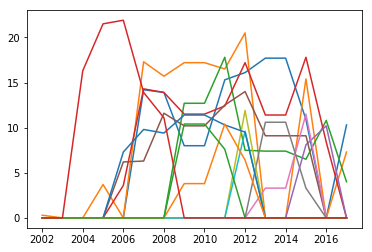

In [83]:
plt.plot(players_plot.index, players_plot)
plt.legend()
plt.show()

### Individual Plots (date range 2006-2017)

KENNY BRITT

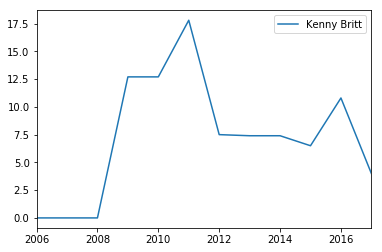

In [92]:
kenny_britt = pd.DataFrame(applicable_players.set_index("Player").loc["Kenny Britt"].transpose())
kenny_britt = kenny_britt.drop([2002, 2003, 2004, 2005])
kenny_britt.plot()
plt.show()

FRED DAVIS

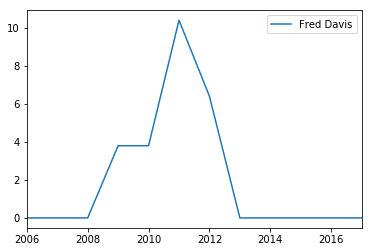

In [114]:
fred_davis = pd.DataFrame(applicable_players.set_index("Player").loc["Fred Davis"].transpose())
fred_davis = fred_davis.drop([2002, 2003, 2004, 2005])
fred_davis.plot()
plt.show()

MARSHAWN LYNCH

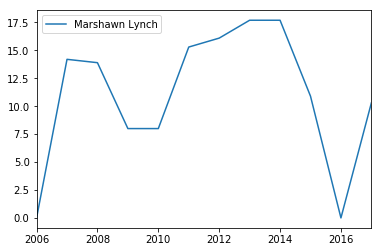

In [115]:
marshawn_lynch = pd.DataFrame(applicable_players.set_index("Player").loc["Marshawn Lynch"].transpose())
marshawn_lynch = marshawn_lynch.drop([2002, 2003, 2004, 2005])
marshawn_lynch.plot()
plt.show()

ADRIAN PETERSON

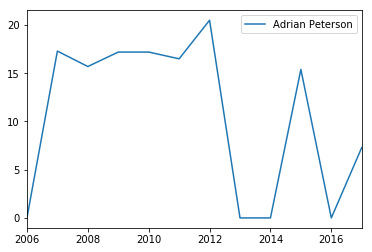

In [116]:
adrian_peterson = pd.DataFrame(applicable_players.set_index("Player").loc["Adrian Peterson"].transpose())
adrian_peterson = adrian_peterson.drop([2002, 2003, 2004, 2005])
adrian_peterson.plot()
plt.show()

BRANDON MARSHALL

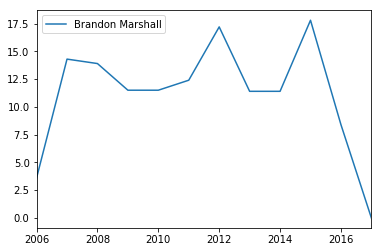

In [98]:
brandon_marshall = pd.DataFrame(applicable_players.set_index("Player").loc["Brandon Marshall"].transpose())
brandon_marshall = brandon_marshall.drop([2002, 2003, 2004, 2005])
brandon_marshall.plot()
plt.show()

MATT JONES

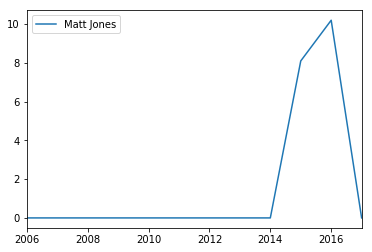

In [117]:
matt_jones = pd.DataFrame(applicable_players.set_index("Player").loc["Matt Jones"].transpose()) 
matt_jones = matt_jones.drop([2002, 2003, 2004, 2005]) 
matt_jones.plot() 
plt.show()

VINCENT JACKSON

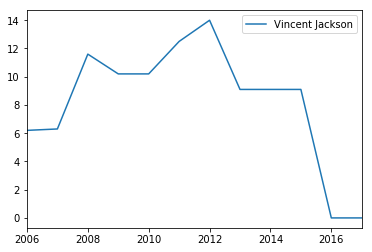

In [118]:
vincent_jackson = pd.DataFrame(applicable_players.set_index("Player").loc["Vincent Jackson"].transpose())
vincent_jackson = vincent_jackson.drop([2002, 2003, 2004, 2005])
vincent_jackson.plot()
plt.show()

JOSEPH RANDLE

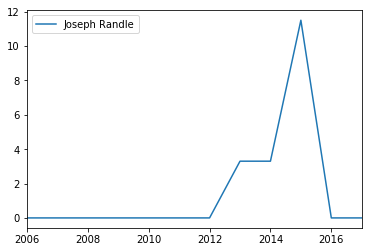

In [119]:
joseph_randle = pd.DataFrame(applicable_players.set_index("Player").loc["Joseph Randle"].transpose())
joseph_randle = joseph_randle.drop([2002, 2003, 2004, 2005])
joseph_randle.plot()
plt.show()

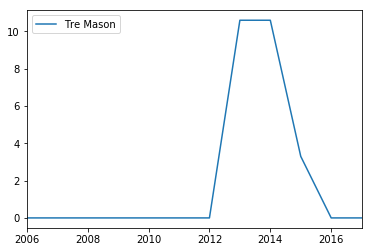

In [120]:
tre_mason = pd.DataFrame(applicable_players.set_index("Player").loc["Tre Mason"].transpose())
tre_mason = tre_mason.drop([2002, 2003, 2004, 2005])
tre_mason.plot()
plt.show()

MICKEL LESHOURE

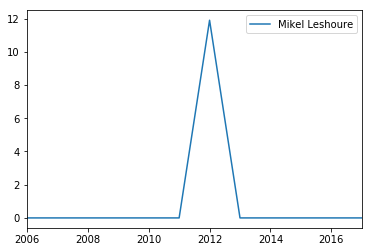

In [122]:
mikel_leshoure = pd.DataFrame(applicable_players.set_index("Player").loc["Mikel Leshoure"].transpose())
mikel_leshoure = mikel_leshoure.drop([2002, 2003, 2004, 2005])
mikel_leshoure.plot()
plt.show()

JUSTIN BLACKMON

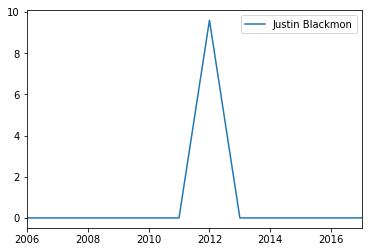

In [123]:
justin_blackmon = pd.DataFrame(applicable_players.set_index("Player").loc["Justin Blackmon"].transpose())
justin_blackmon = justin_blackmon.drop([2002, 2003, 2004, 2005])
justin_blackmon.plot()
plt.show()

CEDRIC BENSON

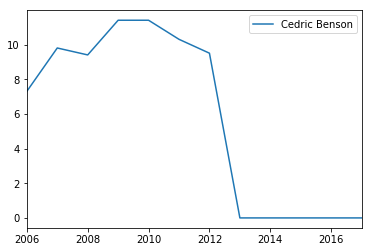

In [124]:
cedric_benson = pd.DataFrame(applicable_players.set_index("Player").loc["Cedric Benson"].transpose())
cedric_benson = cedric_benson.drop([2002, 2003, 2004, 2005])
cedric_benson.plot()
plt.show()

JEROME SIMPSON

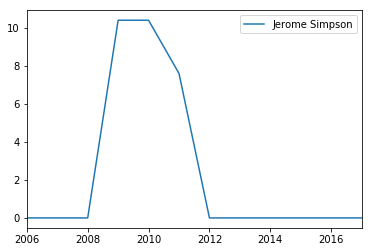

In [125]:
jerome_simpson = pd.DataFrame(applicable_players.set_index("Player").loc["Jerome Simpson"].transpose())
jerome_simpson = jerome_simpson.drop([2002, 2003, 2004, 2005])
jerome_simpson.plot()
plt.show()

LARRY JOHNSON

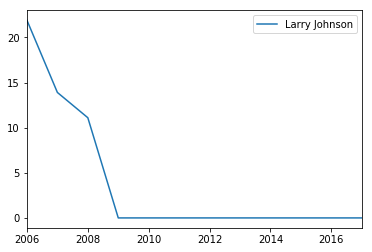

In [126]:
larry_johnson = pd.DataFrame(applicable_players.set_index("Player").loc["Larry Johnson"].transpose())
larry_johnson = larry_johnson.drop([2002, 2003, 2004, 2005])
larry_johnson.plot()
plt.show()